<hr>
<hr>
<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Рынок заведений общественного питания Москвы</h1>
  </div>
</div>

## <a name="content">Содержание</a>
- [0. Знакомство с проектом](#0)
 - [0.1. Описание данных](#0.1)
 - [0.2. Подключение библиотек](#0.2)
- [Шаг №1. Загрузка данных и подготовка их к анализу](#1)
- [Шаг №2. Анализ данных](#2)
 - [2.1. Исследование соотношение видов объектов общественного питания по количеству. Построение графика](#2.1)
 - [2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика](#2.2)
 - [2.3. Для какого вида объекта общественного питания характерно сетевое распространение?](#2.3)
 - [2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4)
 - [2.5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построение графика](#2.5)
 - [2.6. Выделение в отдельный столбец информации об улице из столбца `address`](#2.6)
 - [2.7. Построениие графика топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?](#2.7)
 - [2.8. Найдем число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?](#2.8)
 - [2.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Закономерности](#2.9)
- [Шаг №3. Подготовка презентации](#3)
<hr>
<hr>

## 0. Знакомство с проектом  <a name="0"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

### Рассчет:

##### Шаг №1. Загрузите данные и подготовьте их к анализу

##### Шаг №2. Анализ данных:
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

##### Шаг №3. Подготовка презентации

### 0.1. Описание данных  <a name="0.1"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

Таблица `rest_data`:
- *object_name* — название объекта общественного питания;
- *chain* — сетевой ресторан;
- *object_type* — тип объекта общественного питания;
- *address* — адрес;
- *number* — количество посадочных мест.

<hr>

In [1]:
from bs4 import BeautifulSoup

## Шаг №1. Загрузка данных и подготовка их к анализу  <a name="1"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(rc={'figure.figsize':(10, 8)})
import math
import numpy as np
from IPython.display import display
from datetime import datetime
pd.set_option('display.max_columns', None)
sns.set_palette('deep')

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')

In [4]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

In [6]:
bad_symbols = [',', '«', '»', '(', ')', '"', '  ']
for i in bad_symbols:
    df['object_name'] = df['object_name'].str.replace(i, ' ')

In [7]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Привели все к нижнему регистру для простоты анализа, заменили символы на пробелы. Посмотрели информацию о датафрейме. Дубли не были обнаружены.

<hr>

## Шаг №2. Анализ данных<a name="2"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

Итогом данного шага будет общий вывод, рекомендации о виде заведения, количестве посадочных мест, районе расположения, рекомендации к развитию сети.

### 2.1. Исследование соотношение видов объектов общественного питания по количеству. Построение графика<a name="2.1"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [8]:
temp = df.groupby('object_type').count().reset_index()

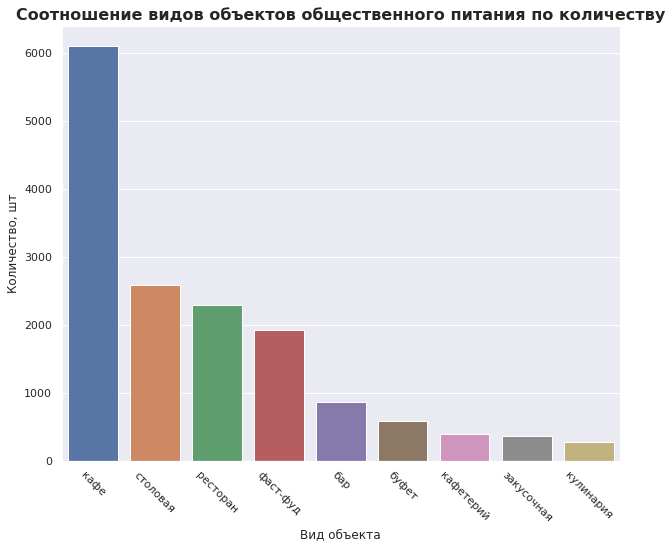

In [9]:
ax = temp[['object_type', 'number']].set_index('object_type').sort_values('number', ascending=False)
ax = sns.barplot(x=ax.index, y=ax['number'], data=ax)
plt.xticks(rotation=-45)
ax.set(xlabel='Вид объекта', ylabel='Количество, шт')
plt.title('Соотношение видов объектов общественного питания по количеству', weight='bold').set_fontsize('16')

In [10]:
df.groupby('object_type')['object_type'].count().sort_values(ascending=False)

object_type
кафе          6099
столовая      2587
ресторан      2285
фаст-фуд      1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: object_type, dtype: int64

Больше всего ресторанных объектов - кафе, столовые, рестораны и фастфуды. Других на порядок меньше.

### 2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика <a name="2.2"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [11]:
summary = df['chain'].count()
def func_pct(pct):
    value = int(pct/100.*summary)
    return "{:.2f}%\n({:.0f} шт.)".format(pct, value)

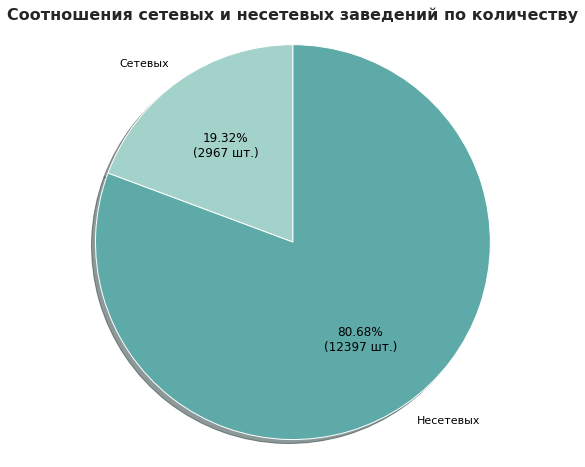

In [12]:
temp = df.groupby('chain')['object_name'].count().sort_values()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=['Сетевых', 'Несетевых'], autopct = lambda pct: func_pct(pct),
        shadow=True, startangle=90, colors=['#a3d2ca', '#5eaaa8'], textprops=dict(color="black"))
ax1.axis('equal')
plt.title('Соотношения сетевых и несетевых заведений по количеству', weight='bold').set_fontsize('16')
plt.show()

Сетевых заведений почти в 4 раза меньше.

### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?<a name="2.3"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [13]:
temp = (df
        .query('chain == "да"')[['chain','object_type']]
        .groupby('object_type')
        .count()
        .sort_values('chain', ascending=False)
       )

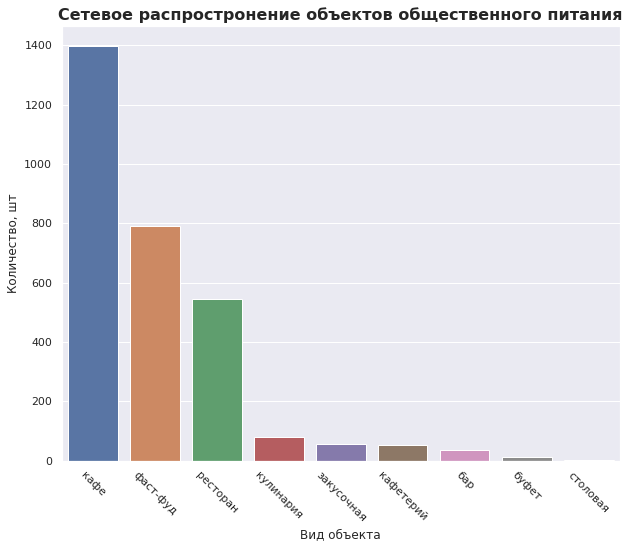

In [14]:
ax = sns.barplot(x=temp.index, y=temp['chain'], data=temp)
plt.xticks(rotation=-45)
ax.set(xlabel='Вид объекта', ylabel='Количество, шт')
plt.title('Сетевое распростронение объектов общественного питания', weight='bold').set_fontsize('16')

С большим отрывом лидируют кафе, фаст-фуды и рестораны.

### 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a name="2.4"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [15]:
temp = df.query('chain == "да"')

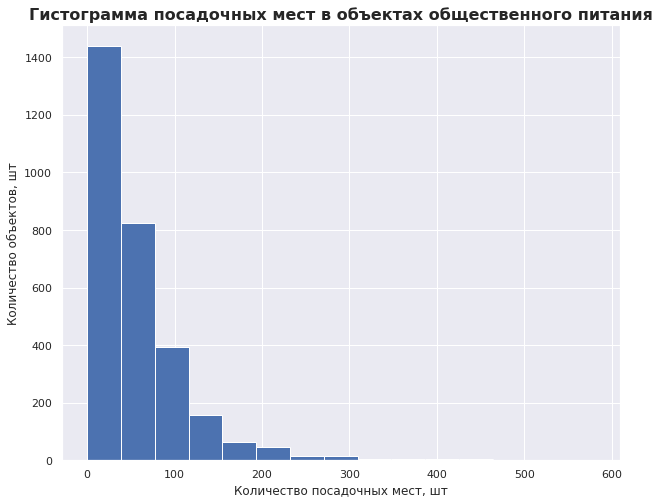

In [16]:
ax = temp['number'].hist(bins=15);
ax.set(xlabel='Количество посадочных мест, шт', ylabel='Количество объектов, шт')
plt.title('Гистограмма посадочных мест в объектах общественного питания', weight='bold').set_fontsize('16')

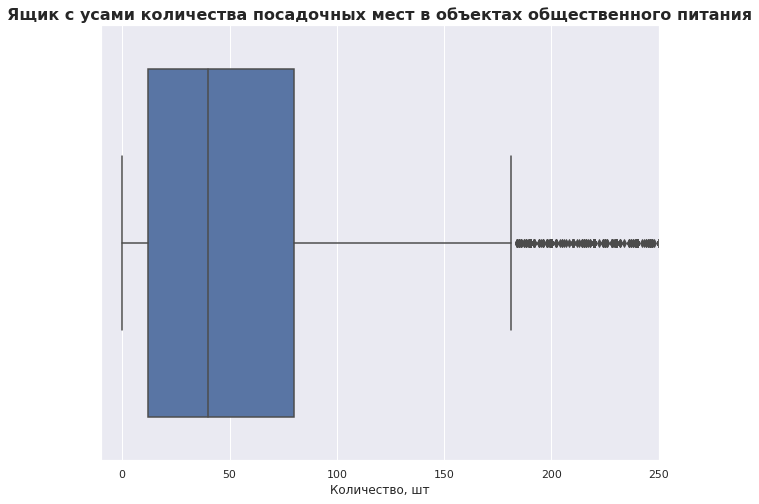

In [17]:
ax = sns.boxplot(x=df['number'])
ax.set(xlabel='Количество, шт', xlim=(-10, 250))
plt.title('Ящик с усами количества посадочных мест в объектах общественного питания', weight='bold').set_fontsize('16')

In [18]:
temp['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Характерно большое количество заведений со средним числом посадочных мест в каждом. Имеются и выбросы, но это скорее исключения из правил. В среднем около 150 мест.

### 2.5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построение графика.<a name="2.5"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

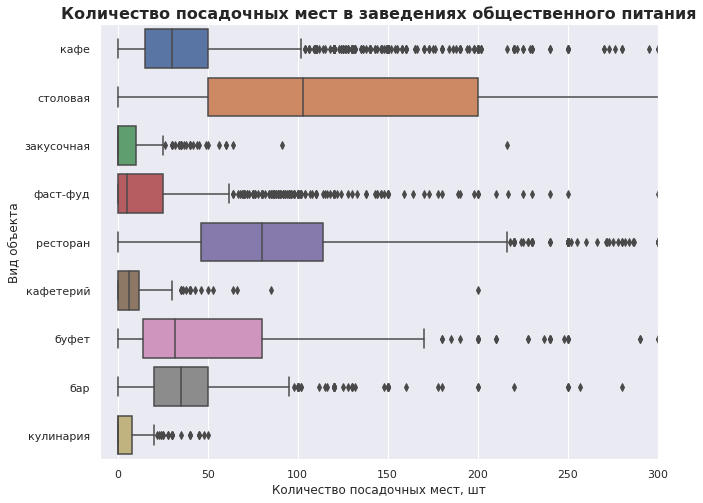

In [19]:
ax = sns.boxplot(x='number', y='object_type', data=df)
ax.set_xlim(-10,300)
ax.set(xlabel='Количество посадочных мест, шт', ylabel='Вид объекта')
plt.title('Количество посадочных мест в заведениях общественного питания', weight='bold').set_fontsize('16')
plt.show()

In [20]:
display(df.groupby('object_type')['number'].describe())

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
фаст-фуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0


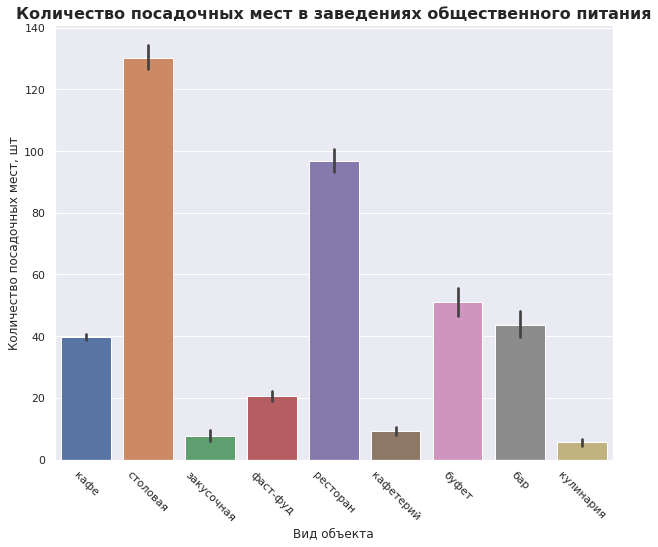

In [21]:
ax = sns.barplot(x='object_type', y='number', data=df)
plt.xticks(rotation=-45)
ax.set(xlabel='Вид объекта', ylabel='Количество посадочных мест, шт')
plt.title('Количество посадочных мест в заведениях общественного питания', weight='bold').set_fontsize('16')

Большое количество посадочных мест характерно в большей степени для столовых и ресторанах, там найдется где присесть. В меньшей степени для буфетов, баров и кафе. В остальных заведениях мест значительно меньше.

### 2.6. Выделение в отдельный столбец информации об улице из столбца `address`<a name="2.6"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [22]:
def get_street(row):
    street = ['проспект', "площадь", "улица", "шоссе", 
                   "бульвар", 'переулок','набережная','проезд','Зеленоград',
                   'тупик','микрорайон','территория','километр','посёлок','деревня'
                   ,'аллея','просек','линия','квартал','село','вблизи']
    address = row['address'].split(',') # пилим строку с адресом на части
    parts = len(address) # считаем количество получившихся частей распиленного адреса    
    try:
        for element in street:
            for i in range(parts):
                if element in address[i]:  
                    return address[i]
    except:
        return 'Error'
    
df['street'] = df.apply(get_street, axis=1)
display(df.head(3))

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе академия,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица


### 2.7. Построениие графика топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?<a name="2.7"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [23]:
temp = df.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street'])
temp

,street,id,object_name,chain,object_type,address,number
0,проспект мира,204,204,204,204,204,204
1,профсоюзная улица,182,182,182,182,182,182
2,ленинградский проспект,171,171,171,171,171,171
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,164,164,164,164,164,164
5,ленинский проспект,147,147,147,147,147,147
6,проспект вернадского,132,132,132,132,132,132
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,112,112,112,112,112,112
9,кировоградская улица,110,110,110,110,110,110


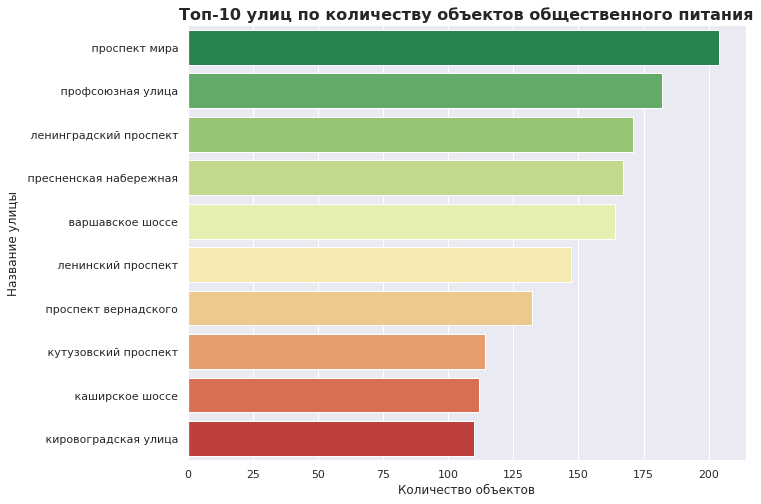

In [24]:
ax = sns.barplot(x='object_type', y='street', data=temp, palette="RdYlGn_r")
ax.set(xlabel='Количество объектов', ylabel='Название улицы')
plt.title('Топ-10 улиц по количеству объектов общественного питания', weight='bold').set_fontsize('16')
plt.show()

Воспользовавшись внешней информацией находим районы расположение вышеописанных улиц:
- **Проспект Мира**: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
- **Профсоюзная улица**: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
- **Ленинградский проспект**: Беговой, Аэропорт, Сокол, Хорошёвский
- **Пресненская набережная**: Пресненский
- **Варшавское шоссе**: Донской, Нагатино-Садовники, Нагорный
- **Ленинский проспект**: Гагаринский и Донской
- **Проспект Вернадского**: Проспект Вернадского
- **Кутузовский проспект**: Дорогомилово, Фили-Давыдково
- **Каширское шоссе**: Нагатино-Садовники и Нагорный
- **Кировоградская улица**: Чертаново Северное, Чертаново Центральное, Чертаново Южное

### 2.8. Найдем число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?<a name="2.8"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [25]:
API_URL = 'https://geocode-maps.yandex.ru/1.x'
def make_request_for_coords(address):
    """Получает координаты.
    
    В случае удачного выполнения, возвращает координаты адреса.
    
    :param address: Адрес распложения объекта.
    """
    params = {
        'geocode': address,
        'format': 'json',
        'apikey': token
    }
    
    r = requests.get(API_URL, params=params)
    return r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']


start_time = datetime.now()
coordinates = []

for address in df['address'].tolist():
    try:
        coordinate = make_request_for_coords(address)
        coordinates.append(coordinate)
    except:
        coordinates.append('Что-то пошло не так')     
        
end_time = datetime.now()
print('Продолжительность выполнения: {}'.format(end_time - start_time))

Продолжительность выполнения: 0:46:37.295336


In [27]:
def make_request_for_disctrict(coordinate):
    """Получает район.
    
    В случае удачного выполнения, возвращает район расположение координат.
    
    :param coordinate: Координаты.
    """
    params = {
        'geocode': coordinate,
        'format': 'json',
        'apikey': token
    }
    
    r = requests.get(API_URL, params=params)
    return r.json()['response']['GeoObjectCollection']['featureMember'][2]\
['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['Locality']['DependentLocality']['DependentLocality']['DependentLocalityName']


start_time = datetime.now()
district = []

for coordinate in coordinates:
    try:
        x = make_request_for_disctrict(coordinate)
        district.append(x)
    except:
        district.append('Что-то пошло не так')

end_time = datetime.now()
print('Продолжительность выполнения: {}'.format(end_time - start_time))

Продолжительность выполнения: 0:30:47.528764


In [28]:
df['district'] = district
display(df.head(3))

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,Ярославский район
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,Таганский район
2,24309,кафе академия,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,Таганский район


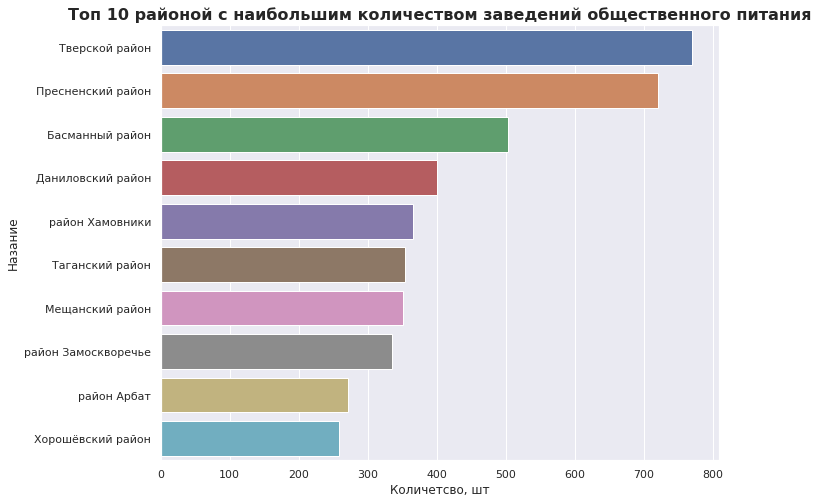

In [29]:
temp = (df[['district', 'id']]
        .query('district != "Что-то пошло не так"')
        .groupby('district')
        .count()
        .sort_values('id', ascending=False)
        .reset_index()
        .rename(columns={'id': 'count'})
        .head(10)
       )

ax = sns.barplot(x='count', y='district', data=temp)
ax.set(title='Топ 10 районой с наибольшим количеством заведений общественного питания')
ax.set(xlabel='Количетсво, шт', ylabel='Назание')
plt.title('Топ 10 районой с наибольшим количеством заведений общественного питания', weight='bold').set_fontsize('16')

Наибольшее количество заведений находится в центре города Москвы. 

### 2.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Закономерности<a name="2.9"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

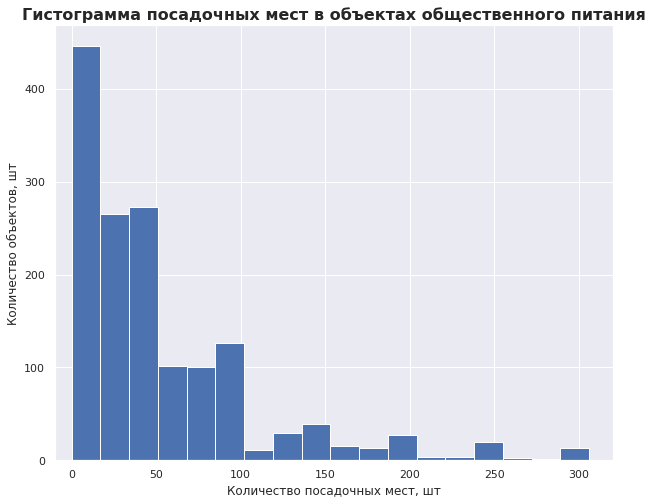

In [30]:
temp = df[df['street'].isin(top_10)]
ax = temp['number'].hist(bins=100);
ax.set(xlabel='Количество посадочных мест, шт', ylabel='Количество объектов, шт', xlim= (-10, 320))
plt.title('Гистограмма посадочных мест в объектах общественного питания', weight='bold').set_fontsize('16')

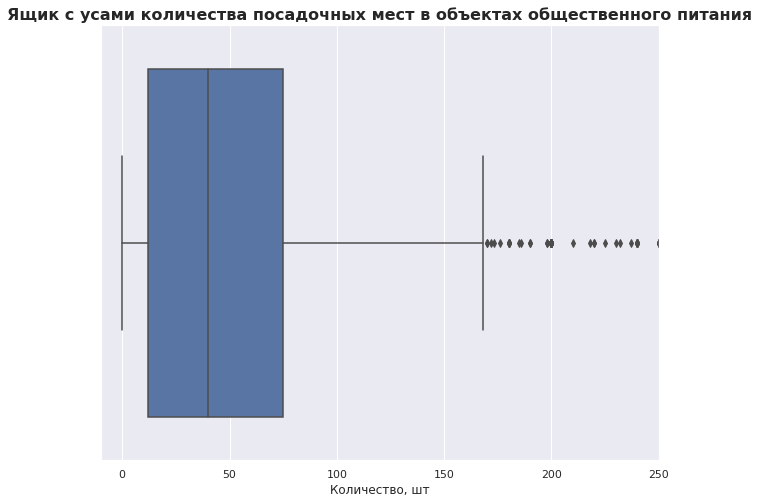

In [31]:
ax = sns.boxplot(x=temp['number'])
ax.set(xlabel='Количество, шт', xlim=(-10, 250))
plt.title('Ящик с усами количества посадочных мест в объектах общественного питания', weight='bold').set_fontsize('16')

На улицах с большим количеством заведений общественного питания меньше посадочных мест, чем во всей выборке. Среднее количество около 40. Возможно это связано с ценами за квадратные метры. К тому же большинство этих улиц находятся в дорогих районах города.

Небольшое кафе с малым количеством посадочных мест вполне может оправдать себя даже без роботов.

<hr>

## Шаг №3. Подготовка презентации<a name="3"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

[Скачать презентацию в формате PDF](https://yadi.sk/i/LgDOiqaV5rYF5Q)